In [1]:
import pandas as pd
import numpy as np

In [8]:
players = pd.read_csv("/content/players_17.csv")

In [9]:
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM, ST",94,94,87000000.0,575000.0,31,...,53+4,53+4,53+4,61+4,20+4,https://cdn.sofifa.net/players/020/801/17_120.png,https://cdn.sofifa.net/teams/243/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,RW,93,93,89000000.0,575000.0,29,...,45+4,45+4,45+4,57+4,19+4,https://cdn.sofifa.net/players/158/023/17_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
2,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Peter Neuer,GK,92,92,69500000.0,225000.0,30,...,33+4,33+4,33+4,34+4,89+3,https://cdn.sofifa.net/players/167/495/17_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png
3,176580,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez Díaz,ST,92,92,83000000.0,525000.0,29,...,58+4,58+4,58+4,64+4,37+4,https://cdn.sofifa.net/players/176/580/17_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1377/60.png,https://cdn.sofifa.net/flags/uy.png
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Júnior,LW,92,95,109000000.0,450000.0,24,...,46+4,46+4,46+4,58+4,20+4,https://cdn.sofifa.net/players/190/871/17_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1370/60.png,https://cdn.sofifa.net/flags/br.png


In [10]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [11]:
players = players.dropna(subset=features)

In [12]:
data = players[features].copy()

In [13]:
data

,overall,potential,wage_eur,value_eur,age
0,94,94,575000.0,87000000.0,31
1,93,93,575000.0,89000000.0,29
2,92,92,225000.0,69500000.0,30
3,92,92,525000.0,83000000.0,29
4,92,95,450000.0,109000000.0,24
...,...,...,...,...,...
17591,45,64,1000.0,60000.0,18
17592,45,64,500.0,60000.0,18
17593,45,63,2000.0,70000.0,18
17594,45,62,1000.0,70000.0,19


In [14]:
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1

In [15]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,17286.000000,17286.000000,17286.000000,17286.000000,17286.000000
mean,5.299008,6.178514,1.191921,1.179703,3.981122
std,1.463934,1.241798,0.395957,0.425592,1.521273
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.265306,5.400000,1.026110,1.024955,2.666667
50%,5.285714,6.200000,1.060923,1.059359,3.666667
75%,6.306122,7.000000,1.165361,1.146518,5.000000
max,11.000000,11.000000,11.000000,11.000000,11.000000


In [16]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,11.000000,10.8,11.000000,8.981596,6.000000
1,10.795918,10.6,11.000000,9.165087,5.333333
2,10.591837,10.4,4.907746,7.376047,5.666667
3,10.591837,10.4,10.129678,8.614613,5.333333
4,10.591837,11.0,8.824195,11.000000,3.666667


In [17]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [19]:
centroids = random_centroids(data, 10)

In [20]:
centroids

,0,1,2,3,4,5,6,7,8,9
overall,4.673469,5.081633,5.081633,1.612245,5.693878,5.081633,5.897959,4.877551,6.102041,7.326531
potential,7.400000,4.800000,5.600000,5.400000,4.000000,5.400000,9.600000,7.200000,7.200000,6.400000
wage_eur,1.008703,2.557876,1.513490,1.339426,3.254134,1.026110,1.513490,1.000000,2.035683,1.008703
value_eur,1.029542,1.284136,1.034129,1.024955,1.061653,1.061653,1.036423,1.045598,1.045598,1.963054
age,2.000000,6.000000,1.666667,1.666667,2.000000,2.000000,3.000000,3.666667,6.333333,3.000000


In [21]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [22]:
labels = get_labels(data, centroids)

In [23]:
labels.value_counts()

7    3697
1    2947
8    2822
5    2221
0    1939
9    1501
3    1476
6     634
2      49
dtype: int64

In [24]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [26]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

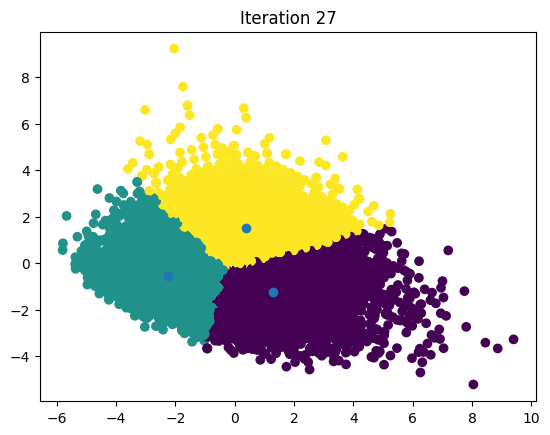

In [27]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [28]:
centroids

,0,1,2
overall,6.519813,3.645827,5.386743
potential,7.413988,5.552211,5.415647
wage_eur,1.353460,1.028982,1.113630
value_eur,1.364949,1.025621,1.069412
age,3.589692,2.481077,5.313519


In [29]:
labels.value_counts()

2    6202
0    5659
1    5425
dtype: int64

In [30]:
players[labels == 0][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
0,Cristiano Ronaldo,94,94,575000.0,87000000.0,31
1,L. Messi,93,93,575000.0,89000000.0,29
2,M. Neuer,92,92,225000.0,69500000.0,30
3,L. Suárez,92,92,525000.0,83000000.0,29
4,Neymar,92,95,450000.0,109000000.0,24
...,...,...,...,...,...,...
12378,V. Selimovic,63,81,2000.0,625000.0,19
12379,M. D'Arpino,63,80,6000.0,725000.0,20
12390,M. de Ligt,63,83,1000.0,575000.0,16
12392,M. Briceño,63,80,3000.0,750000.0,20


In [31]:
from sklearn.cluster import KMeans

In [32]:
kmeans = KMeans(3)
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [33]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
overall,6.868079,4.012674,5.412339
potential,7.531044,5.825286,5.420982
wage_eur,1.488723,1.037812,1.112382
value_eur,1.506491,1.034203,1.064762
age,4.025517,2.653433,5.445904
